In [1]:
import torch
import torch.nn as nn
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.optim as optim

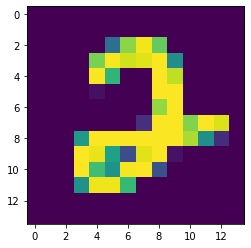

In [18]:
data = pd.read_csv('../inputs/even_mnist.csv', header = None, sep = ' ')


test_data = data.sample(n=3000, random_state=1)
train_data = data.drop(test_data.columns, axis=1)

test_labels = data.iloc[-1 , :]
train_labels = data.iloc[-1 , :]

test_data = test_data/255
train_data = train_data/255

test_data.drop(test_data.tail(1).index,inplace=True)
train_data.drop(train_data.tail(1).index,inplace=True)

foo = np.array(train_data[5])
plt.imshow(np.reshape(foo, (14,14)))

In [116]:
test_data = data.sample(n=3000, random_state=1)
train_data = data.drop(test_data.index)


,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
29488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
29489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
29490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [112]:
data = pd.read_csv('../inputs/even_mnist.csv', header = None, sep = ' ')
images = data.iloc[:,:-1]
labels = data.iloc[:,-1:]
np.array(images.iloc[0])

0

In [75]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(196, 98) 
        self.fc2 = nn.Linear(98, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        
        return x


In [76]:
one_hot_matrix = F.one_hot(torch.arange(0, 5) , num_classes=5)

def one_hot(target, one_hot):
    new_target_vector = one_hot[int(target/2)]
    return new_target_vector



In [77]:
device = torch.device("cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [78]:
targets = torch.from_numpy(np.array(train_labels))
targets[0]

tensor(0)

In [79]:
model = Net().to(torch.device(device))

In [80]:
inputs = torch.from_numpy(np.array(train_data.transpose()))
foo = torch.reshape(inputs[1].float(), (1,-1))
x = model.forward(foo)
x

<ipython-input-75-040632623555>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


tensor([[0.2006, 0.1933, 0.2079, 0.2107, 0.1874]], grad_fn=<SoftmaxBackward>)

In [81]:
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [85]:
num_epochs = int(1e4)
display_epochs = int(1e3)

obj_vals= []

inputs = torch.from_numpy(np.array(train_data.transpose()))

loss = nn.CrossEntropyLoss()

for epoch in range(10): 
    for i in range(len(train_data.columns)):
        #input_temp = torch.reshape(inputs[i].float(), (1,-1))
        input_temp = inputs[i].float()
#         print(input_temp)
         
        input_temp = input_temp.to(device)
        target_temp = one_hot(train_labels[i], one_hot_matrix)
        target_temp = target_temp.to(device).float()
        #target_temp = torch.reshape(target_temp, (1,-1)).float()
#         print(target_temp)
#         print('\n')
        optimizer.zero_grad()
        obj_val = loss(model.forward(input_temp), )
#         print(model.forward(input_temp))
#         print('\n')
        
         # clear any previous gradients  
        obj_val.backward() # backprop step, calculates gradient values
        optimizer.step() # apply gradients to model parameters
#         print(obj_val.item())
#         print('\n')
        obj_vals.append(obj_val.item())
    print(f'Epoch [{epoch}/{10}]\tLoss: {obj_val.item()}')

<ipython-input-75-040632623555>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


TypeError: expected np.ndarray (got numpy.int64)

In [ ]:
with torch.no_grad():
    for i in range(len(test_data.columns)):
        

In [23]:
inputs.shape

torch.Size([26492, 196])

In [24]:
inputs[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9333,
        0.9922, 0.9882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0392, 0.8784, 0.9922, 0.9882, 0.9882, 0.9922, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9333, 0.9922,
        0.9922, 0.9922, 0.7412, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.6471, 0.9922, 0.9882, 0.2941, 0.4745, 0.0000, 0.9922,
        0.6471, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2235, 0.9882, 0.9412,
        0.1098, 0.0000, 0.0000, 0.0000, 0.9922, 0.7647, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.9647, 0.9922, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        1.0000, 0.7686, 0.0000, 0.0000, 